In [94]:
# Data and Stats packages
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Modeling
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [95]:
boston_dataset = load_boston()

In [96]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston["MEDV"] = boston_dataset.target
boston = boston[["RM", "LSTAT", "MEDV"]].copy()
boston.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


Feature Information:
- **RM**: Average number of rooms per dwelling
- **LSTAT**: Percent of housing population classified as "lower status"
- **MEDV**: Median value of owner-occupied homes in $1000's

In [97]:
# save data
boston.to_csv("boston_housing.csv", index=False)

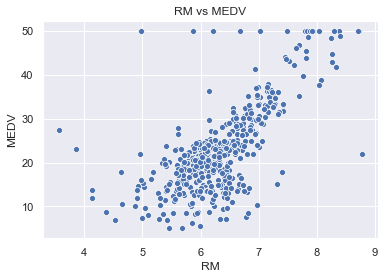

In [115]:
sns.scatterplot(x="RM", y="MEDV", data=boston).set_title('RM vs MEDV')
plt.show()

In [100]:
model = LinearRegression().fit(boston[["RM"]], boston.MEDV)
model.coef_, model.intercept_, r2_score(boston.MEDV, model.predict(boston[["RM"]]))

(array([9.10210898]), -34.67062077643857, 0.48352545599133423)

In [101]:
# Multiple regression + Interaction between RM and LSTAT

If we want to ask, “What is the effect of LSTAT on median value”, the answer is “it depends on what
RM equals.”

Text(0.5, 1.0, 'RM vs LSTAT')

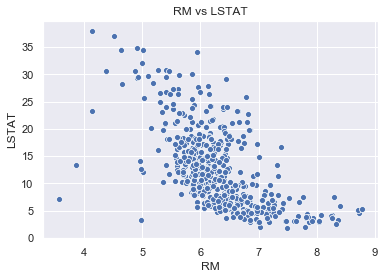

In [120]:
sns.scatterplot(x="RM", y="LSTAT", data=boston).set_title('RM vs LSTAT')

In [103]:
model = LinearRegression().fit(boston[["LSTAT", "RM"]], boston.MEDV)
model.intercept_, model.coef_, r2_score(boston.MEDV, model.predict(boston[["LSTAT", "RM"]]))

(array([-0.64235833,  5.09478798]), -1.3582728118744605, 0.6385616062603403)

In [104]:
boston["LSTAT*RM"] = boston["LSTAT"]*boston["RM"]
model = LinearRegression().fit(boston[["LSTAT", "RM", "LSTAT*RM"]], boston.MEDV)
model.coef_, model.intercept_, r2_score(boston.MEDV, model.predict(boston[["LSTAT", "RM", "LSTAT*RM"]]))

(array([ 2.19397626,  9.70125599, -0.48494278]),
 -29.124517984051206,
 0.7402460563066404)

In [105]:
#Polynomial regression (up to quadratic term) with LSTAT

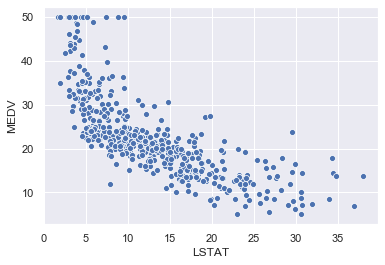

In [106]:
#RStat doesnt seem to have a linear relationship with median value
sns.scatterplot(x="LSTAT", y="MEDV", data=boston)

In [107]:
model = LinearRegression().fit(boston[["LSTAT"]], boston.MEDV)
model.coef_, model.intercept_, r2_score(boston.MEDV, model.predict(boston[["LSTAT"]]))

(array([-0.95004935]), 34.55384087938311, 0.5441462975864799)

In [108]:
# talk about pretty big improvement in Rsquared with quadratic term
boston["LSTAT**2"] = boston["LSTAT"]**2
model = LinearRegression().fit(boston[["LSTAT", "LSTAT**2"]], boston.MEDV)
model.coef_, model.intercept_, r2_score(boston.MEDV, model.predict(boston[["LSTAT", "LSTAT**2"]]))

(array([-2.3328211 ,  0.04354689]), 42.862007328169355, 0.6407168971636611)

In [109]:
# talk about not much improvement in R squared + overfitting
boston["LSTAT**3"] = boston["LSTAT"]**3
model = LinearRegression().fit(boston[["LSTAT", "LSTAT**2", "LSTAT**3"]], boston.MEDV)
model.coef_, model.intercept_, r2_score(boston.MEDV, model.predict(boston[["LSTAT", "LSTAT**2","LSTAT**3"]]))

(array([-3.86559278e+00,  1.48738477e-01, -2.00386767e-03]),
 48.64962534157566,
 0.6578476405895719)

In [110]:
## Combining everything together. Barely any improvement over interaction, overfitting?

In [111]:
model = LinearRegression().fit(boston[["LSTAT", "RM", "LSTAT*RM", "LSTAT**2", "LSTAT**3"]], boston.MEDV)
model.coef_, model.intercept_, r2_score(boston.MEDV, model.predict(boston[["LSTAT", "RM", "LSTAT*RM", "LSTAT**2", "LSTAT**3"]]))

(array([ 1.19199899e+00,  9.06054549e+00, -4.66386433e-01,  5.51711298e-02,
        -9.82827520e-04]), -21.266953104308772, 0.7440855178226335)